In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the basic librairies
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
import scipy

# Visualization 
import matplotlib.pyplot as plt
import missingno #missing values , deal with text
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model




# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Projet S8/covid19_tweets.csv")

In [ ]:
df.head(7)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False


<b>Common data cleaning steps on all text:</b> <br>
Make text all lower case <br>
Remove punctuation <br>
Remove numerical values<br>
Remove common non-sensical text (/n)<br>
Tokenize text<br>
Remove stop words<br>

<b>More data cleaning steps after tokenization:</b>

Stemming / lemmatization <br>
Parts of speech tagging<br>
Create bi-grams or tri-grams<br>
Deal with typos<br>

In [ ]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [ ]:
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [ ]:
#Retrieve the source of all the tweets => some retweets may also be present
df['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [ ]:
df['source'].value_counts()

Twitter Web App              56891
Twitter for Android          40179
Twitter for iPhone           35472
TweetDeck                     8543
Hootsuite Inc.                7321
                             ...  
Apphi                            1
PostPickr                        1
Washington Square Parkerz        1
 Xinhua Sports                   1
Rumpet's Twitter Poster          1
Name: source, Length: 610, dtype: int64

In [ ]:
#pour une visualisation, plot the largest ones
df['source'].value_counts().nlargest(36)

Twitter Web App                   56891
Twitter for Android               40179
Twitter for iPhone                35472
TweetDeck                          8543
Hootsuite Inc.                     7321
Twitter for iPad                   4336
Buffer                             2728
Sprout Social                      1833
Instagram                          1759
IFTTT                              1545
dlvr.it                             681
GlobalPandemic.NET                  679
LinkedIn                            628
COVID19-Updates                     625
Twitter Media Studio                596
WordPress.com                       537
HubSpot                             513
Sprinklr                            497
FS Poster                           414
Dynamic Signal                      391
Resistbot Open Letters              390
Cheap Bots, Done Quick!             335
Paper.li                            322
Twitter for Advertisers             317
Blood Donors India                  281


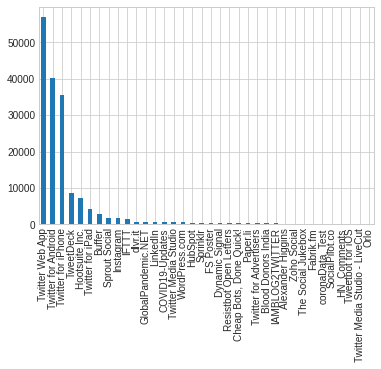

In [ ]:
#pour une visualisation, plot the largest ones
df['source'].value_counts().nlargest(36).plot(kind='bar')

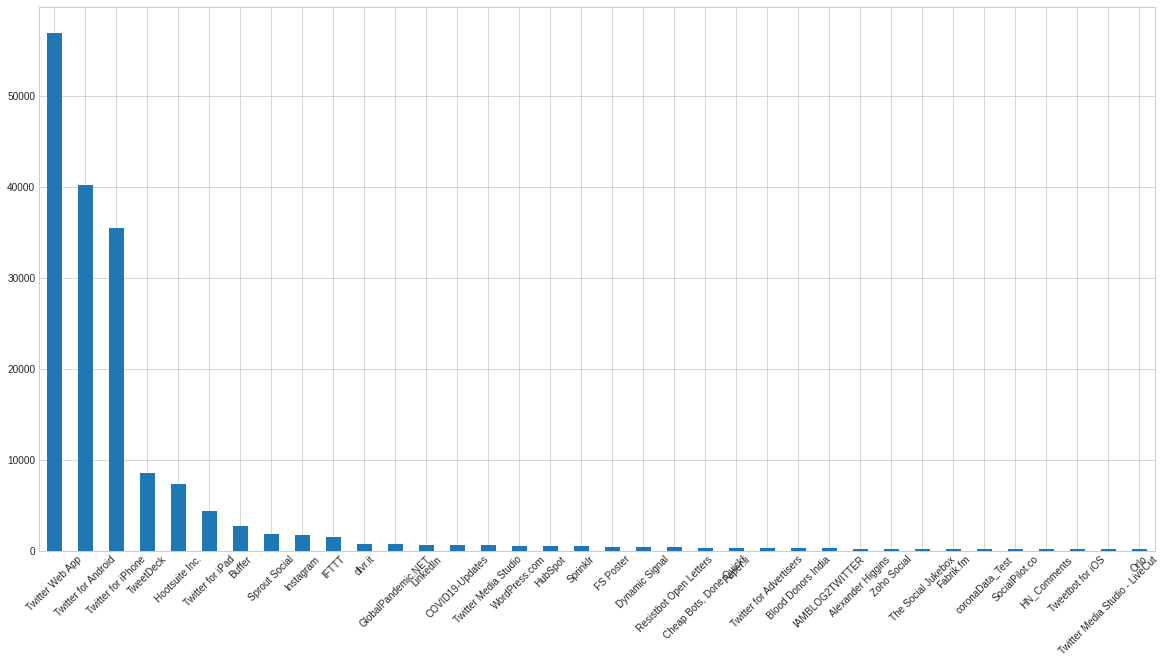

In [ ]:
#pour une visualisation, plot the largest ones
plt.figure(figsize=(20.,10))
df['source'].value_counts().nlargest(36).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from collections import Counter

In [ ]:
import spacy
nlp = spacy.load('en')

In [ ]:
dfHash= df['hashtags']

In [ ]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

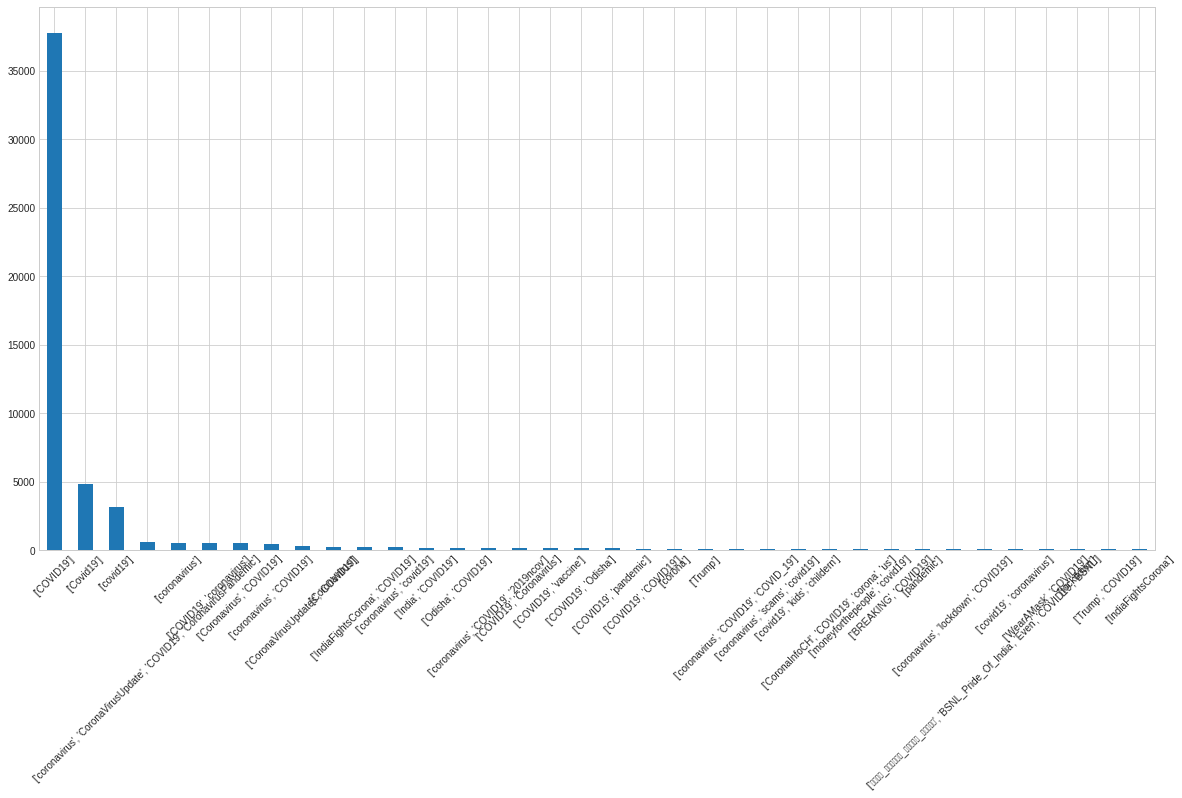

In [ ]:
#pour une visualisation, plot the largest ones
plt.figure(figsize=(20.,10))
dfHash.value_counts().nlargest(36).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
dfHash.dropna(
    axis=0,
    how='any',
    inplace=True
)

In [ ]:
dfHash.isnull().sum()

0

In [ ]:
dfHash.replace("nan", np.nan , inplace=True)
dfHash.dropna(inplace=True)

In [ ]:
dfHash.head(3)

2                          ['COVID19']
3                          ['COVID19']
4    ['CoronaVirusUpdates', 'COVID19']
Name: hashtags, dtype: object

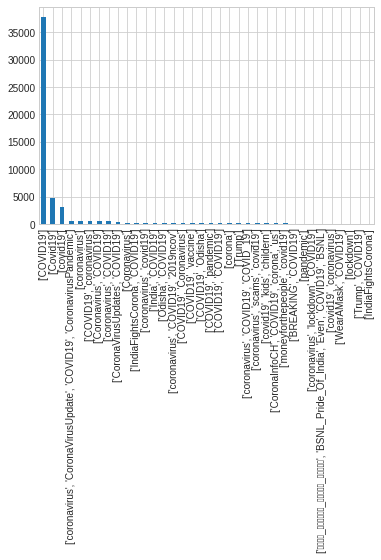

In [ ]:
df['hashtags'].value_counts().nlargest(36).plot(kind='bar')

In [ ]:
df['hashtags'].dtypes == object

True

In [ ]:
nlp = spacy.load("en")

In [ ]:
!pip install neattext

In [ ]:
import neattext.functions as nfx
#List all the methodes

In [ ]:
dfHash.head(3)

2                          ['COVID19']
3                          ['COVID19']
4    ['CoronaVirusUpdates', 'COVID19']
Name: hashtags, dtype: object

In [ ]:
dfHash = dfHash.astype(str)

In [ ]:
dfHash = dfHash.apply(nfx.remove_puncts)

In [ ]:
dfHash

2                                    [COVID19]
3                                    [COVID19]
4                 [CoronaVirusUpdates COVID19]
5                        [coronavirus covid19]
6                         [COVID19 Recruiting]
                          ...                 
179101    [nurses COVID19 coronavirus schools]
179102                               [covid19]
179103                             [WearAMask]
179104                               [COVID19]
179106                               [COVID19]
Name: hashtags, Length: 127774, dtype: object

In [ ]:
dfHash= dfHash.apply(nfx.remove_special_characters)

In [ ]:
dfHash.head(3)

2                       COVID19
3                       COVID19
4    CoronaVirusUpdates COVID19
Name: hashtags, dtype: object

In [ ]:
dfHash = dfHash.apply(nfx.remove_stopwords)

In [ ]:
dfHash.head(3)

0        nan
1        nan
2    COVID19
Name: hashtags, dtype: object

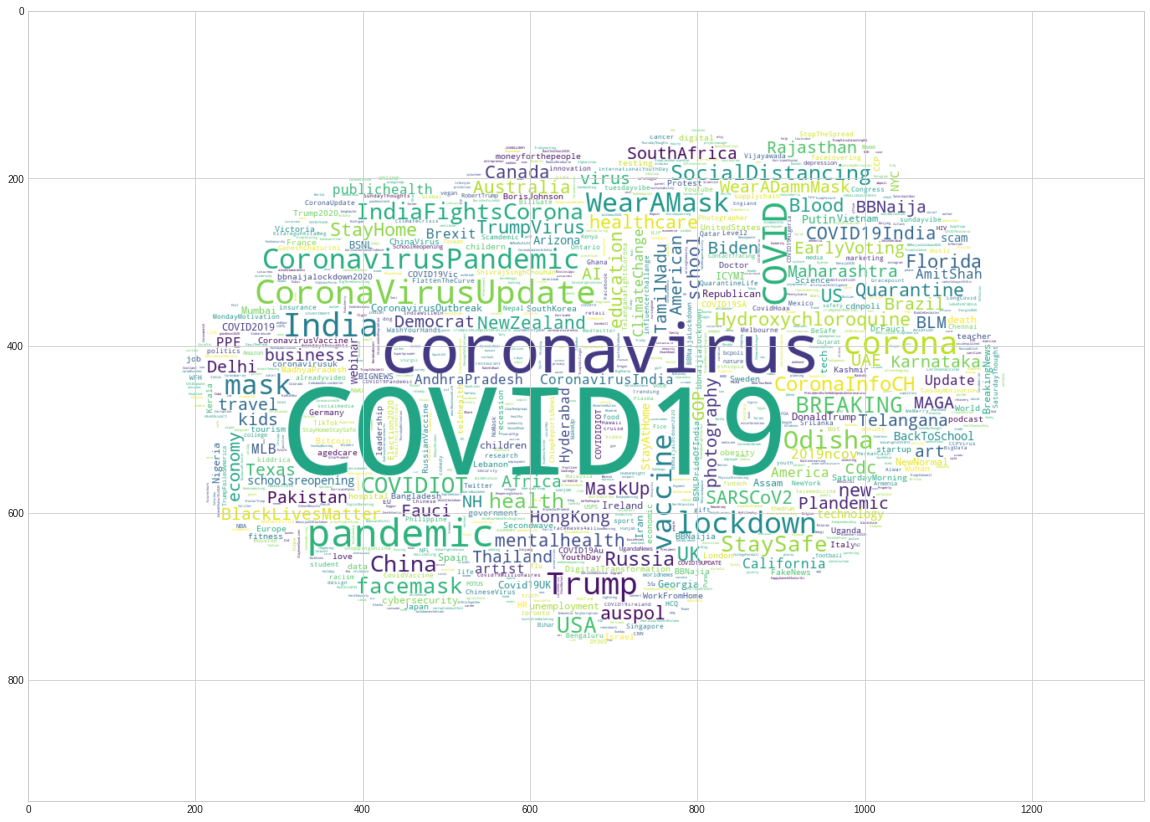

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import itertools
from PIL import Image
mask = np.array(Image.open("/content/drive/MyDrive/Projet S8/cloud.png"))
plt.figure(figsize = (20,20)) # Text that is True News Headlines
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,background_color="white",collocations=False,mask=mask).generate(" ".join(dfHash))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
dfHash.head(3)

2                       COVID19
3                       COVID19
4    CoronaVirusUpdates COVID19
Name: hashtags, dtype: object

In [ ]:
dfHss = dfHash.copy(True)

In [ ]:
dfHss.head(3)

2                       COVID19
3                       COVID19
4    CoronaVirusUpdates COVID19
Name: hashtags, dtype: object

In [ ]:
txt = dfHss[3]
txt

'COVID19'

In [ ]:
doc = nlp(txt)    
olist = []
for token in doc:
    l = [token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_]
    olist.append(l)
    
odf = pd.DataFrame(olist)
odf.columns= ["Text", "StartIndex", "Lemma", "IsPunctuation", "IsSpace", "WordShape", "PartOfSpeech", "POSTag"]
odf

,Text,StartIndex,Lemma,IsPunctuation,IsSpace,WordShape,PartOfSpeech,POSTag
0,COVID19,0,covid19,False,False,XXXXdd,INTJ,UH


In [ ]:
import nltk, os, re, string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk import pos_tag
import nltk, os, re, string
from nltk.corpus import wordnet
from nltk.corpus import stopwords
## A. TOTAL NUMBER OF WORDS USED
df['nb_words'] = s.apply(lambda x: len(x.split()))

## B. TOTAL NUMBER OF UNIQUE WORDS USED
ss['nb_unique_words'] =  ss['hashtags'].apply(lambda x: len(set(x.split())))

## C. TOTAL NUMBER OF CHARACTERS USED
ss['nb_char'] =  ss['hashtags'].apply(lambda x: len(x))

# D. TOTAL SPECIAL CHARACTERS USED

ss["nb_special"] =  ss['hashtags'].apply(lambda p: sum( not q.isalpha() for q in p))


## D. TOTAL NUMBER OF PUNCTUATION USED
def punct(text):
    return(len([w for w in text.split() if w in list(string.punctuation)]))
ss['nb_punct'] =  ss['hashtags'].apply(lambda x: punct(x))

## E. TOTAL NUMBER OF STOPWORDS USED
stopword = stopwords.words('english')
def stop(text):
    return(len([w for w in text.split() if w in stopword]))
ss['nb_stopwords'] =  ss['hashtags'].apply(lambda x: stop(x))

## F. TOTAL NUMBER OF TITLE WORDS USED
def title(text):
    return(len([w for w in text.split() if w.istitle()]))
ss['nb_title_case'] =  ss['hashtags'].apply(lambda x: title(x))

## G. TOTAL NUMBER OF UPPERCASE WORDS USED
def upper(text):
    return(len([w for w in text.split() if w.isupper()]))
ss['nb_title_case'] =  ss['hashtags'].apply(lambda x: upper(x))

## H. NUMBER OF MOST FREQUENT TERMS
token = nltk.word_tokenize(''.join( ss['hashtags']))
frequent = nltk.FreqDist(token)
frequent.most_common(15)

[('COVID19', 10420),
 ('COVID19COVID19', 2103),
 ('coronavirus', 1977),
 ('covid19', 1827),
 ('Covid19', 1491),
 ('Coronavirus', 701),
 ('COVID19COVID19COVID19', 649),
 ('CoronaVirusUpdate', 638),
 ('pandemic', 500),
 ('COVID19coronavirus', 395),
 ('corona', 387),
 ('India', 383),
 ('lockdown', 352),
 ('COVID19Covid19', 340),
 ('COVID19covid19', 301)]

In [ ]:
## REMOVING PUNCTUATION AND STOPWORDS FROM MOST FREQUENT WORDS
for sym in string.punctuation:
    del frequent[sym]
for word in stopword:
    del frequent[word]
frequent.most_common(15)

[('COVID19', 10420),
 ('COVID19COVID19', 2103),
 ('coronavirus', 1977),
 ('covid19', 1827),
 ('Covid19', 1491),
 ('Coronavirus', 701),
 ('COVID19COVID19COVID19', 649),
 ('CoronaVirusUpdate', 638),
 ('pandemic', 500),
 ('COVID19coronavirus', 395),
 ('corona', 387),
 ('India', 383),
 ('lockdown', 352),
 ('COVID19Covid19', 340),
 ('COVID19covid19', 301)]

In [ ]:
## I. NUMBER OF WORDS CONTAIN OUT OF MOST COMMON 100 WORDS 
freq_words = list(dict(frequent.most_common()[:100]).keys())
def freq(text):
    return(len([w for w in text.split() if w in freq_words]))
ss['nb_freq_words'] = ss['hashtags'].apply(lambda x: freq(x))

In [ ]:
ss.head(7)

,hashtags,nb_unique_words,nb_char,nb_special,nb_punct,nb_stopwords,nb_title_case,nb_freq_words
2,COVID19,1,7,2,0,0,1,1
3,COVID19,1,7,2,0,0,1,1
4,CoronaVirusUpdates COVID19,2,26,3,0,0,1,1
5,coronavirus covid19,2,19,3,0,0,0,2
6,COVID19 Recruiting,2,18,3,0,0,1,1
8,covid19 covidPositive,2,21,3,0,0,0,1
9,HurricaneHanna COVID19,2,22,3,0,0,1,1


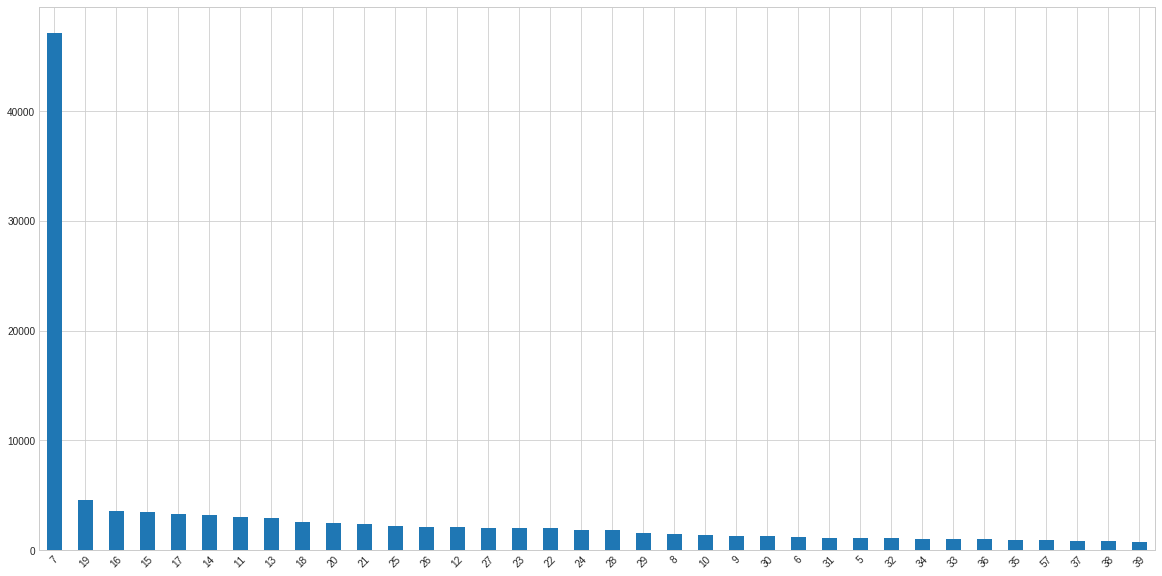

In [ ]:
#pour une visualisation, plot the largest ones
plt.figure(figsize=(20.,10))
ss['nb_char'].value_counts().nlargest(36).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

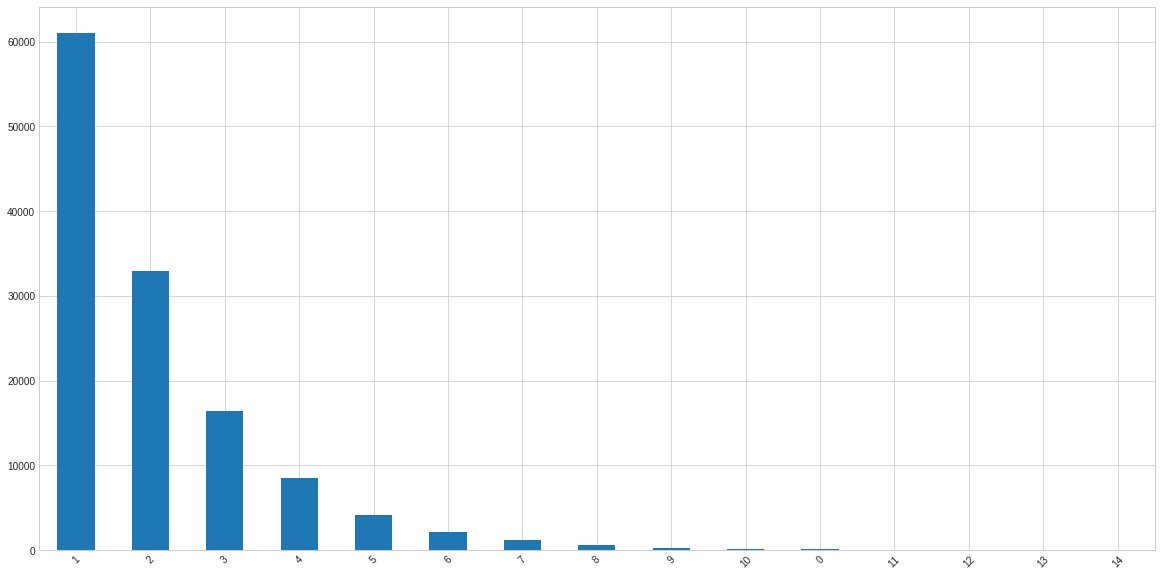

In [ ]:
#pour une visualisation, plot the largest ones
plt.figure(figsize=(20.,10))
ss['nb_unique_words'].value_counts().nlargest(36).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

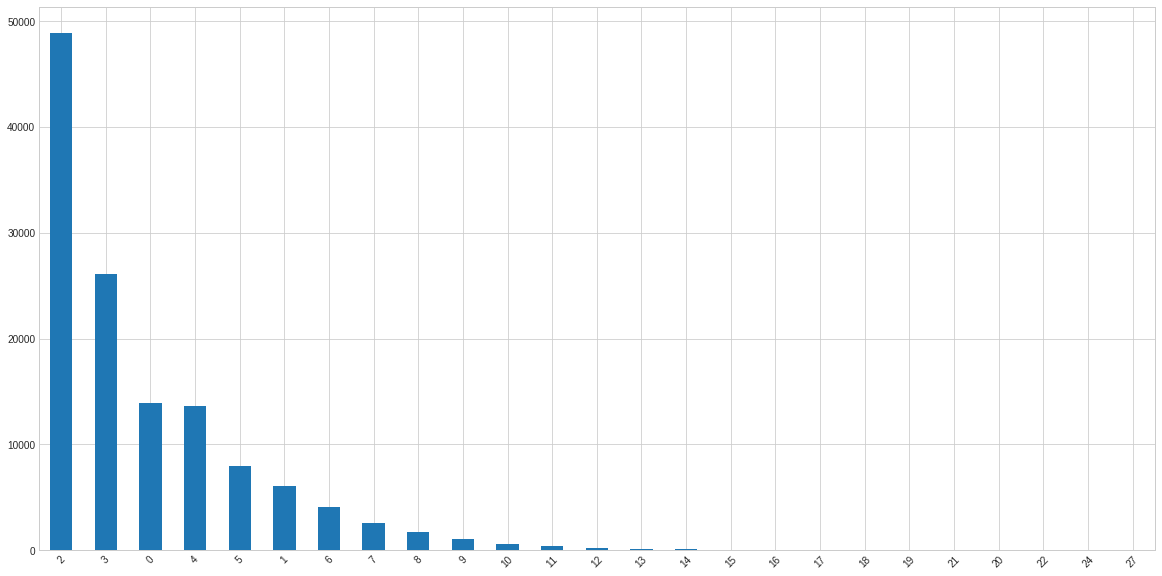

In [ ]:
## D. TOTAL SPECIAL CHARACTERS USED
#pour une visualisation, plot the largest ones
plt.figure(figsize=(20.,10))
ss['nb_special'].value_counts().nlargest(36).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()